<a href="https://colab.research.google.com/github/nimish1402/Abusive-Language-Detection/blob/main/hate_speech_and_offensive_language_augmentation%20ML%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- Importing Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string

import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('all')

from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator

from collections import Counter

from matplotlib import ticker
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report


sns.set(style="darkgrid")
import pandas as pd
import numpy as np
import re
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[n

# 2 Data Exploration

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d thedevastator/hate-speech-and-offensive-language-detection

Dataset URL: https://www.kaggle.com/datasets/thedevastator/hate-speech-and-offensive-language-detection
License(s): CC0-1.0
100% 963k/963k [00:00<00:00, 1.04MB/s]
100% 963k/963k [00:00<00:00, 1.04MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile("/content/hate-speech-and-offensive-language-detection.zip")
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
data=pd.read_csv('/content/train.csv')
data.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [6]:
data['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

Here, 0 - hate speech 1 - offensive language 2 - neither

In [7]:
data.describe()

,count,hate_speech_count,offensive_language_count,neither_count,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


In [8]:
data.isna().sum()
# this indicates that there is no missing values in the dataset

count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
class                       0
tweet                       0
dtype: int64

In [9]:
data.duplicated().sum()

0

There are no duplicate values in the dataset

Therefore there is no requirement for data cleaning

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


In [11]:
# check random tweet
data['tweet'][100]

'"@ClicquotSuave: LMAOOOOOOOOOOO this nigga @Krillz_Nuh_Care http://t.co/AAnpSUjmYI" &lt;bitch want likes for some depressing shit..foh'

In [12]:
data.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


# 2.1 Data Visualization - Distribution of tweet counts per classification category

There is a column called "class" but it's not clear what it represents.

Let's see what "class" represents.

In [13]:
(data
     .groupby("class")
     .agg(
        hate_speech_count=("hate_speech_count", "mean"),
        offensive_language_count=("offensive_language_count", "mean"),
        neither_count=("neither_count", "mean"),
     )
     .round(1)
)

,hate_speech_count,offensive_language_count,neither_count
class,,,
0,2.3,0.8,0.1
1,0.2,3.0,0.1
2,0.1,0.3,2.8


From this, we can see that

*  class 0 = hate tweet
*  class 1 = offensive tweet
*  class 2 = neutral tweet

<Axes: xlabel='class', ylabel='count'>

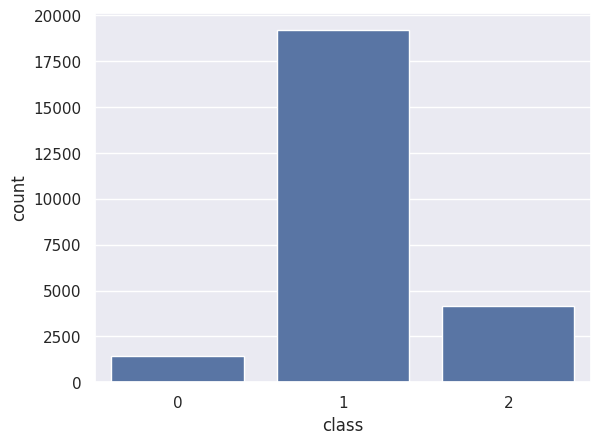

In [14]:
sns.countplot(x='class', data= data)

In [15]:
df = data

# 3- Data Processing

1) remove html entity

2) change user tags (@xxx -> user)

3) remove urls

4) remove unnecessary symbol ('', !, ", ') -> cause a lot of noise in the dataset

5) remove stopwords

To remove the links from text attribute, we have defined the following function with the help of 'Regex'.

In [16]:
# URL Removal
data["tweet"] = data["tweet"].apply(lambda x:re.sub(r'https?://\S+', '', str(x)))
data["tweet"]

0        !!! RT @mayasolovely: As a woman you shouldn't...
1        !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3        !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4        !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
                               ...                        
24778    you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like I ain...
24781                youu got wild bitches tellin you lies
24782    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: tweet, Length: 24783, dtype: object

In [17]:
# Lowercase removal
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['tweet']

0        !!! rt @mayasolovely: as a woman you shouldn't...
1        !!!!! rt @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby...
3        !!!!!!!!! rt @c_g_anderson: @viva_based she lo...
4        !!!!!!!!!!!!! rt @shenikaroberts: the shit you...
                               ...                        
24778    you's a muthaf***in lie &#8220;@lifeasking: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like i ain...
24781                youu got wild bitches tellin you lies
24782    ~~ruffled | ntac eileen dahlia - beautiful col...
Name: tweet, Length: 24783, dtype: object

In [18]:
# Punctuation Removal

data['tweet'] = data['tweet'].str.replace('[^\w\s]','')
data['tweet']

0        !!! rt @mayasolovely: as a woman you shouldn't...
1        !!!!! rt @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby...
3        !!!!!!!!! rt @c_g_anderson: @viva_based she lo...
4        !!!!!!!!!!!!! rt @shenikaroberts: the shit you...
                               ...                        
24778    you's a muthaf***in lie &#8220;@lifeasking: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like i ain...
24781                youu got wild bitches tellin you lies
24782    ~~ruffled | ntac eileen dahlia - beautiful col...
Name: tweet, Length: 24783, dtype: object

In [19]:
# Function to remove usernames/handles

data["tweet"] = data["tweet"].apply(lambda x:re.sub(r'@\w+', '', str(x)))
data["tweet"]

0        !!! rt : as a woman you shouldn't complain abo...
1        !!!!! rt : boy dats cold...tyga dwn bad for cu...
2        !!!!!!! rt  dawg!!!! rt : you ever fuck a bitc...
3                   !!!!!!!!! rt :  she look like a tranny
4        !!!!!!!!!!!!! rt : the shit you hear about me ...
                               ...                        
24778    you's a muthaf***in lie &#8220;:   right! his ...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like i ain...
24781                youu got wild bitches tellin you lies
24782    ~~ruffled | ntac eileen dahlia - beautiful col...
Name: tweet, Length: 24783, dtype: object

In [20]:
# Emoji Removal
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
data["tweet"] = data["tweet"].apply(str)
data["tweet"] = data["tweet"].apply(remove_emoji)
data["tweet"]

0        !!! rt : as a woman you shouldn't complain abo...
1        !!!!! rt : boy dats cold...tyga dwn bad for cu...
2        !!!!!!! rt  dawg!!!! rt : you ever fuck a bitc...
3                   !!!!!!!!! rt :  she look like a tranny
4        !!!!!!!!!!!!! rt : the shit you hear about me ...
                               ...                        
24778    you's a muthaf***in lie &#8220;:   right! his ...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like i ain...
24781                youu got wild bitches tellin you lies
24782    ~~ruffled | ntac eileen dahlia - beautiful col...
Name: tweet, Length: 24783, dtype: object

In [21]:
# Single character and double space removal
data["tweet"] = data["tweet"].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
data["tweet"] = data["tweet"].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
data["tweet"]

0        !!! rt : aswoman you shouldn't complain about ...
1        !!!!! rt : boy dats cold...tyga dwn bad for cu...
2        !!!!!!! rt dawg!!!! rt : you ever fuckbitch an...
3                       !!!!!!!!! rt : she look liketranny
4        !!!!!!!!!!!!! rt : the shit you hear about me ...
                               ...                        
24778    you'smuthaf***in lie &#8220;: right! his tl is...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh likeaint f...
24781                youu got wild bitches tellin you lies
24782    ~~ruffled | ntac eileen dahlia - beautiful col...
Name: tweet, Length: 24783, dtype: object

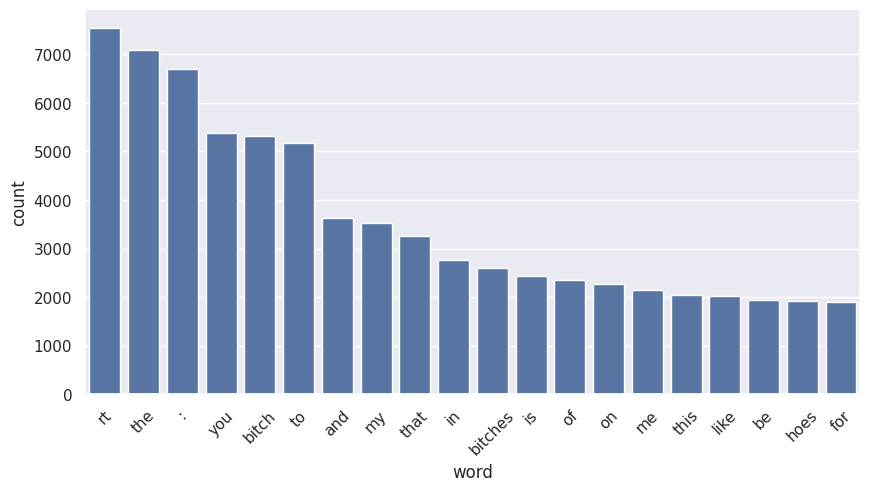

In [22]:
# find the most common words in the dataset

from collections import Counter

words = data['tweet'].apply(lambda x: [word for word in x.split()])

# most common words in the dataset (general)
words = [word for sublist in words for word in sublist]
word_count = Counter(words)
word_count.most_common(20)

# visualize the most common words
import matplotlib.pyplot as plt

word_count_df = pd.DataFrame(word_count.most_common(20), columns=['word', 'count'])

plt.figure(figsize=(10, 5))
sns.barplot(x='word', y='count', data=word_count_df)
plt.xticks(rotation=45)
plt.show()

 The words 'a' and 'rt' and 'the' colon are most common and are not needed for our analysis. We will remove them

### 3.1 Creating a cleaning data function

In [23]:
# clean the data

stop_words = set(stopwords.words('english'))
# add some more stop words
stop_words.add('rt') # .......add rt to remove retweet in dataset (noise)



## remove special characters / html entities
def remove_special_char(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

## remove urls
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

## remove usernames and hashtags
def remove_usernames_hashtags(text):
    return re.sub(r'@\w+|#\w+', '', text)

## remove extra spaces
def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text)


##  clean the text
def clean_text(text):
    text = text.lower()
    text = remove_special_char(text)
    text = remove_urls(text)
    text = remove_usernames_hashtags(text)
    text = remove_extra_spaces(text)
    return text

In [24]:
# apply the cleaning function to the dataset

data['cleaned_tweet'] = data['tweet'].apply(clean_text)

data.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,cleaned_tweet
0,3,0,0,3,2,!!! rt : aswoman you shouldn't complain about ...,rt aswoman you shouldnt complain about cleani...
1,3,0,3,0,1,!!!!! rt : boy dats cold...tyga dwn bad for cu...,rt boy dats coldtyga dwn bad for cuffin dat h...
2,3,0,3,0,1,!!!!!!! rt dawg!!!! rt : you ever fuckbitch an...,rt dawg rt you ever fuckbitch and she start t...
3,3,0,2,1,1,!!!!!!!!! rt : she look liketranny,rt she look liketranny
4,6,0,6,0,1,!!!!!!!!!!!!! rt : the shit you hear about me ...,rt the shit you hear about me might be true o...


In [25]:
# compared cleaned tweet with original tweet

data[['tweet', 'cleaned_tweet']].head(10)

,tweet,cleaned_tweet
0,!!! rt : aswoman you shouldn't complain about ...,rt aswoman you shouldnt complain about cleani...
1,!!!!! rt : boy dats cold...tyga dwn bad for cu...,rt boy dats coldtyga dwn bad for cuffin dat h...
2,!!!!!!! rt dawg!!!! rt : you ever fuckbitch an...,rt dawg rt you ever fuckbitch and she start t...
3,!!!!!!!!! rt : she look liketranny,rt she look liketranny
4,!!!!!!!!!!!!! rt : the shit you hear about me ...,rt the shit you hear about me might be true o...
5,"!!!!!!!!!!!!!!!!!!"": the shit just blows me..c...",the shit just blows meclaim you so faithful a...
6,"!!!!!!"":can not just sit up and hate on anothe...",can not just sit up and hate on another bitch ...
7,!!!!&#8220;: cause i'm tired of you big bitche...,8220 cause im tired of you big bitches coming ...
8,""" &amp; you might not get ya bitch back &amp; ...",amp you might not get ya bitch back amp thats...
9,""" :hobbies include: fighting mariam"" bitch",hobbies include fighting mariam bitch


In [26]:
# remove stop words

def remove_stop_words(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

data['cleaned_tweet_two'] = data['cleaned_tweet'].apply(remove_stop_words)

data[['tweet', 'cleaned_tweet', 'cleaned_tweet_two']].head(10)

,tweet,cleaned_tweet,cleaned_tweet_two
0,!!! rt : aswoman you shouldn't complain about ...,rt aswoman you shouldnt complain about cleani...,aswoman shouldnt complain cleaning house amp a...
1,!!!!! rt : boy dats cold...tyga dwn bad for cu...,rt boy dats coldtyga dwn bad for cuffin dat h...,boy dats coldtyga dwn bad cuffin dat hoe 1st p...
2,!!!!!!! rt dawg!!!! rt : you ever fuckbitch an...,rt dawg rt you ever fuckbitch and she start t...,dawg ever fuckbitch start cry confused shit
3,!!!!!!!!! rt : she look liketranny,rt she look liketranny,look liketranny
4,!!!!!!!!!!!!! rt : the shit you hear about me ...,rt the shit you hear about me might be true o...,shit hear might true might faker bitch told ya...
5,"!!!!!!!!!!!!!!!!!!"": the shit just blows me..c...",the shit just blows meclaim you so faithful a...,shit blows meclaim faithful somebody still fuc...
6,"!!!!!!"":can not just sit up and hate on anothe...",can not just sit up and hate on another bitch ...,sit hate another bitch got much shit going
7,!!!!&#8220;: cause i'm tired of you big bitche...,8220 cause im tired of you big bitches coming ...,8220 cause im tired big bitches coming us skin...
8,""" &amp; you might not get ya bitch back &amp; ...",amp you might not get ya bitch back amp thats...,amp might get ya bitch back amp thats
9,""" :hobbies include: fighting mariam"" bitch",hobbies include fighting mariam bitch,hobbies include fighting mariam bitch


In [27]:
# remove short words

def remove_short_words(text):
    return ' '.join([word for word in text.split() if len(word) > 2])

data['cleaned_tweet_three'] = data['cleaned_tweet_two'].apply(remove_short_words)

In [28]:
data[['tweet', 'cleaned_tweet', 'cleaned_tweet_two', 'cleaned_tweet_three']].tail(10)

,tweet,cleaned_tweet,cleaned_tweet_two,cleaned_tweet_three
24773,you niggers cheat on ya gf's? smh....,you niggers cheat on ya gfs smh,niggers cheat ya gfs smh,niggers cheat gfs smh
24774,you really care bout dis bitch. my dick all in...,you really care bout dis bitch my dick all in ...,really care bout dis bitch dick yo feelings,really care bout dis bitch dick feelings
24775,"you worried bout other bitches, you need me for?",you worried bout other bitches you need me for,worried bout bitches need,worried bout bitches need
24776,you're all niggers,youre all niggers,youre niggers,youre niggers
24777,you're suchretardhope you get type 2 diabetes ...,youre suchretardhope you get type 2 diabetes a...,youre suchretardhope get type 2 diabetes die f...,youre suchretardhope get type diabetes die fro...
24778,you'smuthaf***in lie &#8220;: right! his tl is...,yousmuthafin lie 8220 right his tl is trash 82...,yousmuthafin lie 8220 right tl trash 8230 mine...,yousmuthafin lie 8220 right trash 8230 mine bi...
24779,"you've gone and broke the wrong heart baby, an...",youve gone and broke the wrong heart baby and ...,youve gone broke wrong heart baby drove rednec...,youve gone broke wrong heart baby drove rednec...
24780,young buck wanna eat!!.. dat nigguh likeaint f...,young buck wanna eat dat nigguh likeaint fucki...,young buck wanna eat dat nigguh likeaint fucki...,young buck wanna eat dat nigguh likeaint fucki...
24781,youu got wild bitches tellin you lies,youu got wild bitches tellin you lies,youu got wild bitches tellin lies,youu got wild bitches tellin lies
24782,~~ruffled | ntac eileen dahlia - beautiful col...,ruffled ntac eileen dahlia beautiful color com...,ruffled ntac eileen dahlia beautiful color com...,ruffled ntac eileen dahlia beautiful color com...


In [29]:
data[['tweet', 'cleaned_tweet', 'cleaned_tweet_two', 'cleaned_tweet_three']].head(10)

,tweet,cleaned_tweet,cleaned_tweet_two,cleaned_tweet_three
0,!!! rt : aswoman you shouldn't complain about ...,rt aswoman you shouldnt complain about cleani...,aswoman shouldnt complain cleaning house amp a...,aswoman shouldnt complain cleaning house amp a...
1,!!!!! rt : boy dats cold...tyga dwn bad for cu...,rt boy dats coldtyga dwn bad for cuffin dat h...,boy dats coldtyga dwn bad cuffin dat hoe 1st p...,boy dats coldtyga dwn bad cuffin dat hoe 1st p...
2,!!!!!!! rt dawg!!!! rt : you ever fuckbitch an...,rt dawg rt you ever fuckbitch and she start t...,dawg ever fuckbitch start cry confused shit,dawg ever fuckbitch start cry confused shit
3,!!!!!!!!! rt : she look liketranny,rt she look liketranny,look liketranny,look liketranny
4,!!!!!!!!!!!!! rt : the shit you hear about me ...,rt the shit you hear about me might be true o...,shit hear might true might faker bitch told ya...,shit hear might true might faker bitch told 57361
5,"!!!!!!!!!!!!!!!!!!"": the shit just blows me..c...",the shit just blows meclaim you so faithful a...,shit blows meclaim faithful somebody still fuc...,shit blows meclaim faithful somebody still fuc...
6,"!!!!!!"":can not just sit up and hate on anothe...",can not just sit up and hate on another bitch ...,sit hate another bitch got much shit going,sit hate another bitch got much shit going
7,!!!!&#8220;: cause i'm tired of you big bitche...,8220 cause im tired of you big bitches coming ...,8220 cause im tired big bitches coming us skin...,8220 cause tired big bitches coming skinny gir...
8,""" &amp; you might not get ya bitch back &amp; ...",amp you might not get ya bitch back amp thats...,amp might get ya bitch back amp thats,amp might get bitch back amp thats
9,""" :hobbies include: fighting mariam"" bitch",hobbies include fighting mariam bitch,hobbies include fighting mariam bitch,hobbies include fighting mariam bitch


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
 6   cleaned_tweet             24783 non-null  object
 7   cleaned_tweet_two         24783 non-null  object
 8   cleaned_tweet_three       24783 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.7+ MB


In [31]:
data.isnull().sum()

count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
class                       0
tweet                       0
cleaned_tweet               0
cleaned_tweet_two           0
cleaned_tweet_three         0
dtype: int64

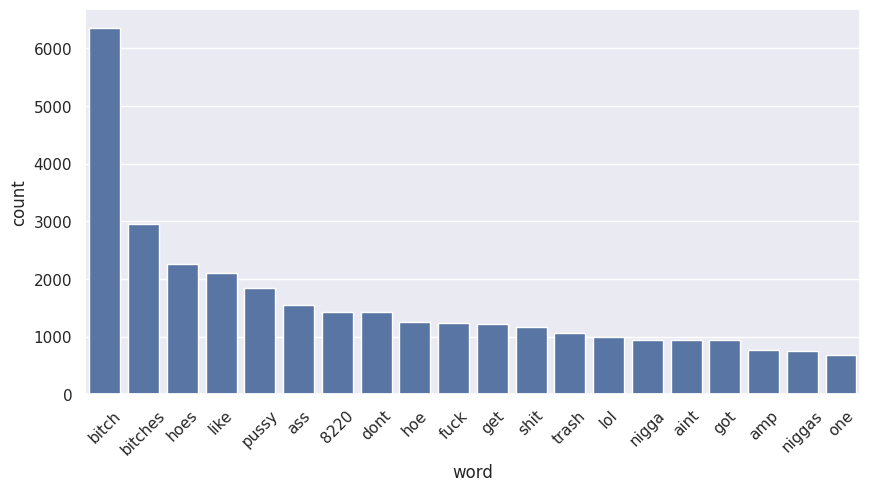

In [32]:
# find the most common words in the dataset

from collections import Counter

words = data['cleaned_tweet_three'].apply(lambda x: [word for word in x.split()])

# most common words in the dataset (general)
words = [word for sublist in words for word in sublist]
word_count = Counter(words)
word_count.most_common(20)

# visualize the most common words
import matplotlib.pyplot as plt

word_count_df = pd.DataFrame(word_count.most_common(20), columns=['word', 'count'])

plt.figure(figsize=(10, 5))
sns.barplot(x='word', y='count', data=word_count_df)
plt.xticks(rotation=45)
plt.show()

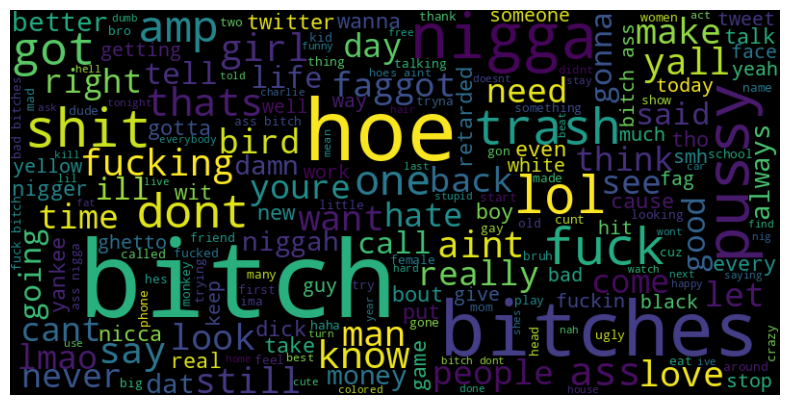

In [33]:
# same with before, but using word cloud

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(' '.join(words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

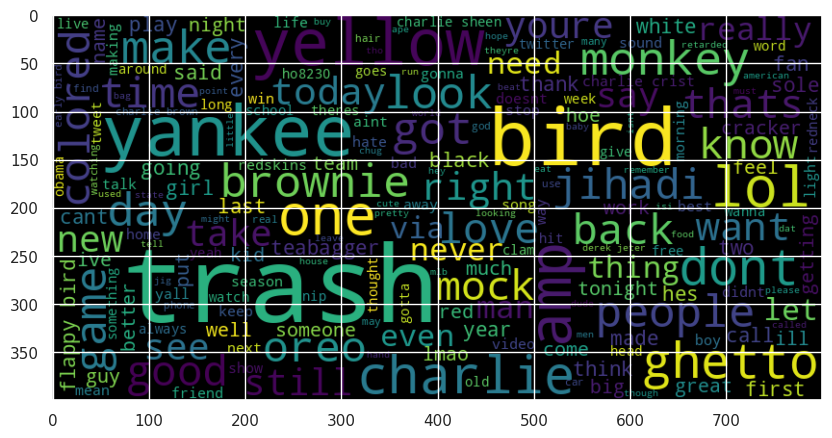

In [34]:
# now im curios. how about the most common words for only the neutral class?
# im assumming that neutral class is number 2 in the class column from looking a bit of the dataset

neutral_tweets = data[data['class'] == 2]['cleaned_tweet_three']
neutral_words = neutral_tweets.apply(lambda x: [word for word in x.split()])

neutral_words = [word for sublist in neutral_words for word in sublist]
neutral_word_count = Counter(neutral_words)
neutral_word_count.most_common(20)

wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(' '.join(neutral_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')


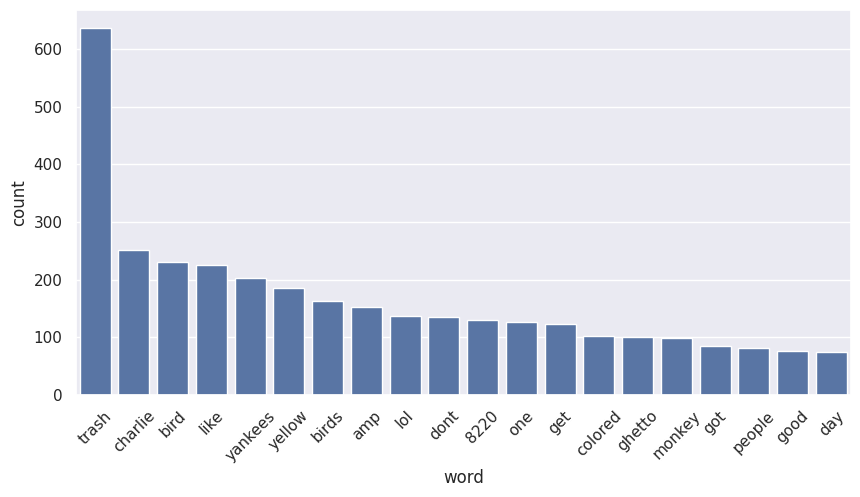

In [35]:
# visualize the most common words in neutral tweets

neutral_word_count_df = pd.DataFrame(neutral_word_count.most_common(20), columns=['word', 'count'])

plt.figure(figsize=(10, 5))
sns.barplot(x='word', y='count', data=neutral_word_count_df)
plt.xticks(rotation=45)
plt.show()

well its quite unexpected, why does trash belong to neutral label? lets take a deeper look

In [36]:
# show thow many tweet that include the word trash in it

data[data['cleaned_tweet_three'].str.contains('trash')]
data[data['cleaned_tweet_three'].str.contains('trash')]['class'].value_counts()

class
2    681
1    346
0    109
Name: count, dtype: int64

In [37]:
# show five random  full tweets that include the word trash in it

pd.set_option('display.max_colwidth', None)
full_tweets_with_word_trash = data[data['cleaned_tweet_three'].str.contains('trash')]['cleaned_tweet_three'].sample(5)
print(full_tweets_with_word_trash)

24603                                                                     top layer trash
6637                                                                     groves trash imo
20538                                 roman catholics trash give catholics europebad name
8526                                            coors light trash yuckdont even like beer
16475    mother trash man 128514ask everyday need want money say naw good come payday8230
Name: cleaned_tweet_three, dtype: object


# 4 Feature Engineering

### 4.1 Tokenization of data

####  Tokenizing (basically we use tokenisation for many things, its commonly used for feature extraction in preprocessing. .... declare the tokenizer ... build the vocabulary based on train dataset .. tokenize the train and test dataset)

In [38]:
import textblob
from textblob import TextBlob

def tokenization(text):
    text = re.split('\W+', text)
    return text

data['Text_tokenized'] = data['cleaned_tweet_three'].apply(lambda x: tokenization(x.lower()))
data.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,cleaned_tweet,cleaned_tweet_two,cleaned_tweet_three,Text_tokenized
0,3,0,0,3,2,!!! rt : aswoman you shouldn't complain about cleaning up your house. &amp; asman you should always take the trash out...,rt aswoman you shouldnt complain about cleaning up your house amp asman you should always take the trash out,aswoman shouldnt complain cleaning house amp asman always take trash,aswoman shouldnt complain cleaning house amp asman always take trash,"[aswoman, shouldnt, complain, cleaning, house, amp, asman, always, take, trash]"
1,3,0,3,0,1,!!!!! rt : boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,rt boy dats coldtyga dwn bad for cuffin dat hoe in the 1st place,boy dats coldtyga dwn bad cuffin dat hoe 1st place,boy dats coldtyga dwn bad cuffin dat hoe 1st place,"[boy, dats, coldtyga, dwn, bad, cuffin, dat, hoe, 1st, place]"
2,3,0,3,0,1,!!!!!!! rt dawg!!!! rt : you ever fuckbitch and she start to cry? you be confused as shit,rt dawg rt you ever fuckbitch and she start to cry you be confused as shit,dawg ever fuckbitch start cry confused shit,dawg ever fuckbitch start cry confused shit,"[dawg, ever, fuckbitch, start, cry, confused, shit]"
3,3,0,2,1,1,!!!!!!!!! rt : she look liketranny,rt she look liketranny,look liketranny,look liketranny,"[look, liketranny]"
4,6,0,6,0,1,!!!!!!!!!!!!! rt : the shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,rt the shit you hear about me might be true or it might be faker than the bitch who told it to ya 57361,shit hear might true might faker bitch told ya 57361,shit hear might true might faker bitch told 57361,"[shit, hear, might, true, might, faker, bitch, told, 57361]"


### 4.2 Lemmitization of Data("Lemmatization" is a natural language processing (NLP) technique used to reduce words to their base or root form)

In [39]:
! python3 -m nltk.downloader wordnet
#! unzip /root/nltk_data/corpora/wordnet.zip -d /root/nltk_data/corpora/
#!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [40]:
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer
wordNet = WordNetLemmatizer()
def lemmatizer(text):
    text = [wordNet.lemmatize(word) for word in text]
    return text

data['Text_lemmatized'] = data['Text_tokenized'].apply(lambda x: lemmatizer(x))
data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,cleaned_tweet,cleaned_tweet_two,cleaned_tweet_three,Text_tokenized,Text_lemmatized
0,3,0,0,3,2,!!! rt : aswoman you shouldn't complain about cleaning up your house. &amp; asman you should always take the trash out...,rt aswoman you shouldnt complain about cleaning up your house amp asman you should always take the trash out,aswoman shouldnt complain cleaning house amp asman always take trash,aswoman shouldnt complain cleaning house amp asman always take trash,"[aswoman, shouldnt, complain, cleaning, house, amp, asman, always, take, trash]","[aswoman, shouldnt, complain, cleaning, house, amp, asman, always, take, trash]"
1,3,0,3,0,1,!!!!! rt : boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,rt boy dats coldtyga dwn bad for cuffin dat hoe in the 1st place,boy dats coldtyga dwn bad cuffin dat hoe 1st place,boy dats coldtyga dwn bad cuffin dat hoe 1st place,"[boy, dats, coldtyga, dwn, bad, cuffin, dat, hoe, 1st, place]","[boy, dat, coldtyga, dwn, bad, cuffin, dat, hoe, 1st, place]"
2,3,0,3,0,1,!!!!!!! rt dawg!!!! rt : you ever fuckbitch and she start to cry? you be confused as shit,rt dawg rt you ever fuckbitch and she start to cry you be confused as shit,dawg ever fuckbitch start cry confused shit,dawg ever fuckbitch start cry confused shit,"[dawg, ever, fuckbitch, start, cry, confused, shit]","[dawg, ever, fuckbitch, start, cry, confused, shit]"
3,3,0,2,1,1,!!!!!!!!! rt : she look liketranny,rt she look liketranny,look liketranny,look liketranny,"[look, liketranny]","[look, liketranny]"
4,6,0,6,0,1,!!!!!!!!!!!!! rt : the shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,rt the shit you hear about me might be true or it might be faker than the bitch who told it to ya 57361,shit hear might true might faker bitch told ya 57361,shit hear might true might faker bitch told 57361,"[shit, hear, might, true, might, faker, bitch, told, 57361]","[shit, hear, might, true, might, faker, bitch, told, 57361]"


# 5 Data Modeling

In [41]:
X = data["cleaned_tweet_three"]
y = data["class"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20)

### Performing TF-IDF Conversion
(t's a statistical measure used to evaluate the importance of a word in a document relative to a collection of documents, typically a corpus.)

In [42]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit((X_train).values.astype('U'))
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  128815


In [43]:
X_train = vectoriser.transform((X_train).values.astype('U'))
X_test  = vectoriser.transform((X_test).values.astype('U'))

In [44]:
# see the shape of the vectorized data

X_train.shape, X_test.shape

((19826, 128815), (4957, 128815))

In [45]:
print(f"num test tweet: {y_test.shape[0]}")
print(f"num train tweet: {y_train.shape[0]}")

num test tweet: 4957
num train tweet: 19826


### Model Evaluation

In [46]:
def model_evaluate(model,X_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    cm_df = pd.DataFrame(cm,
                     index = ['hate speech','offensive language','Neutral'],
                     columns = ['hate speech','offensive language','Neutral'])

    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True, cmap="Oranges",linecolor="gray")
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()

## 5.1 Logistic Regression Model

In [47]:
lr_model = LogisticRegression(C = 1, max_iter = 1000, penalty = 'l2', n_jobs=-1)
lr_model.fit(X_train  ,y_train)

LogisticRegression(C=1, max_iter=1000, n_jobs=-1)

              precision    recall  f1-score   support

           0       0.53      0.10      0.17       287
           1       0.88      0.98      0.92      3829
           2       0.86      0.66      0.75       841

    accuracy                           0.87      4957
   macro avg       0.76      0.58      0.61      4957
weighted avg       0.85      0.87      0.85      4957



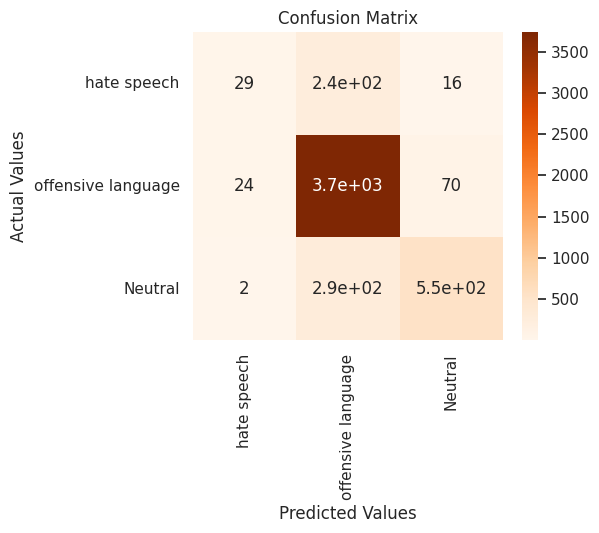

In [48]:
model_evaluate(lr_model ,X_test)

## 5.2 Decision Tree Model

In [49]:
from sklearn.tree import DecisionTreeClassifier

dtmodel = DecisionTreeClassifier()
dtc = dtmodel.fit(X_train,y_train)

              precision    recall  f1-score   support

           0       0.33      0.26      0.30       287
           1       0.90      0.92      0.91      3829
           2       0.77      0.75      0.76       841

    accuracy                           0.86      4957
   macro avg       0.67      0.65      0.66      4957
weighted avg       0.85      0.86      0.85      4957



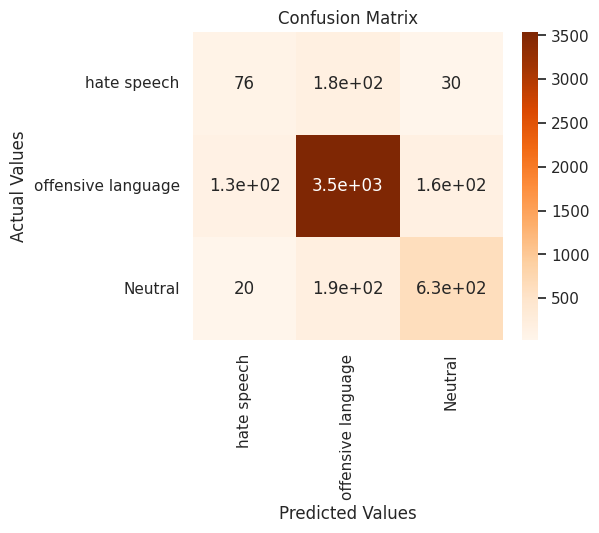

In [50]:
model_evaluate(dtc ,X_test)

##5.3 K-Neighbors Classifier

In [51]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train  ,y_train)

KNeighborsClassifier(n_neighbors=3)

              precision    recall  f1-score   support

           0       0.32      0.35      0.33       287
           1       0.87      0.92      0.90      3829
           2       0.71      0.50      0.59       841

    accuracy                           0.82      4957
   macro avg       0.63      0.59      0.61      4957
weighted avg       0.81      0.82      0.81      4957



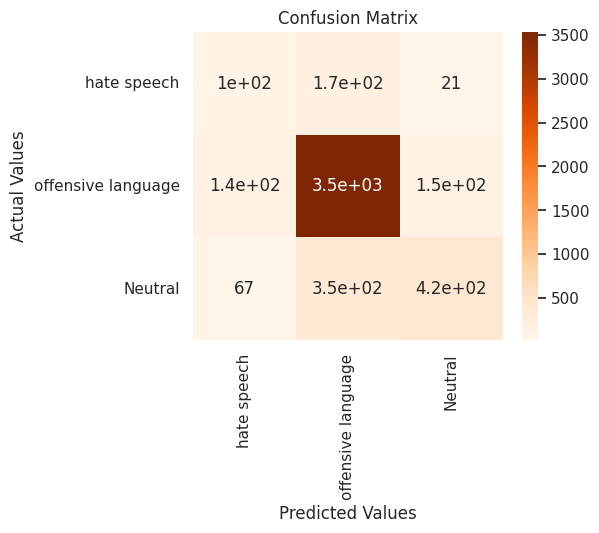

In [52]:
model_evaluate(neigh ,X_test)

##5.4 Random Forest Classifier

In [53]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=10)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

              precision    recall  f1-score   support

           0       0.50      0.18      0.26       287
           1       0.88      0.96      0.92      3829
           2       0.83      0.67      0.74       841

    accuracy                           0.87      4957
   macro avg       0.74      0.60      0.64      4957
weighted avg       0.85      0.87      0.85      4957



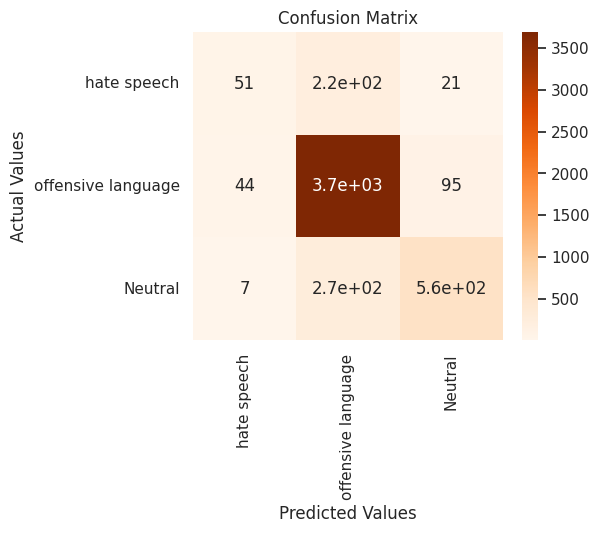

In [54]:
model_evaluate(rfc ,X_test)

## 5.5 XG Boost Classifier

In [55]:
#Import XGB FModel
import xgboost as xgb

#Create a XGB Classifier
xgb_model=xgb.XGBClassifier(objective="multi:softprob")

#Train the model using the training sets
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

              precision    recall  f1-score   support

           0       0.45      0.16      0.24       287
           1       0.88      0.97      0.92      3829
           2       0.87      0.64      0.74       841

    accuracy                           0.87      4957
   macro avg       0.73      0.59      0.63      4957
weighted avg       0.85      0.87      0.85      4957



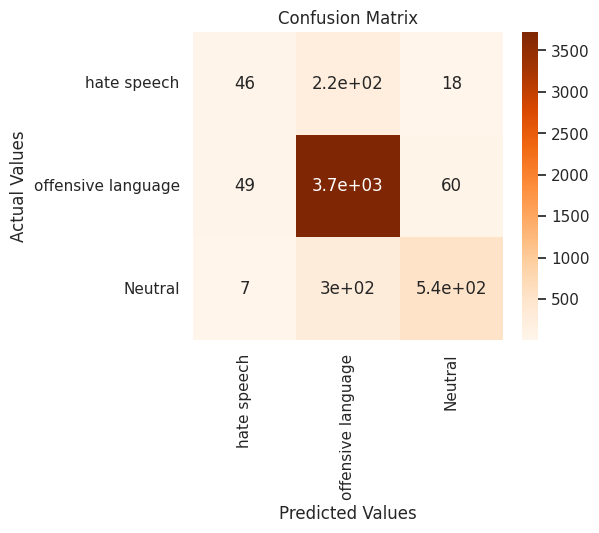

In [56]:
model_evaluate(xgb_model,X_test)

## 5.7 LGBM Classifier

In [57]:
import lightgbm as lgb
lgb = lgb.LGBMClassifier()
lgb.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.105116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 27240
[LightGBM] [Info] Number of data points in the train set: 19826, number of used features: 1022
[LightGBM] [Info] Start training from score -2.853338
[LightGBM] [Info] Start training from score -0.255162
[LightGBM] [Info] Start training from score -1.786427


LGBMClassifier()

              precision    recall  f1-score   support

           0       0.42      0.20      0.27       287
           1       0.88      0.96      0.92      3829
           2       0.82      0.63      0.72       841

    accuracy                           0.86      4957
   macro avg       0.71      0.60      0.63      4957
weighted avg       0.85      0.86      0.85      4957



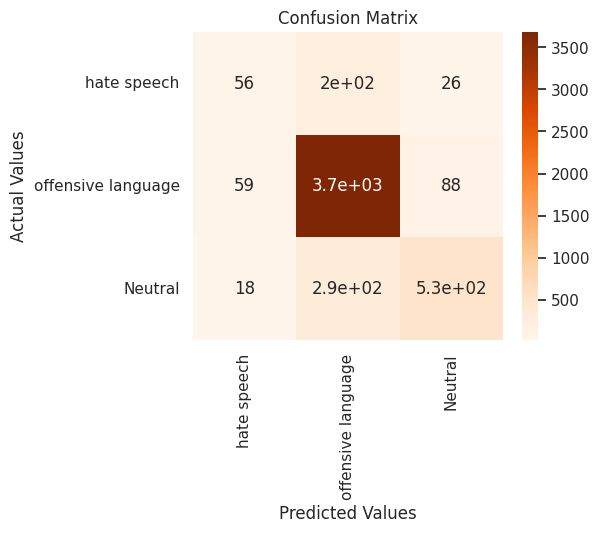

In [58]:
model_evaluate(lgb,X_test)

##### The Logistic Regression,XGB Classifier and LGBM Classifer perform better than the other models. We will select the LGBM Model and perform Hyperparameter to try to improve the metrics for our model

# 6 Hyperparameter Tuning

In [59]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

# Define the LightGBM model
model = lgb.LGBMClassifier()

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                   n_iter=8, scoring='accuracy', cv=3, random_state=42)

In [60]:
# Fit the model
random_search.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(), n_iter=8,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200]},
                   random_state=42, scoring='accuracy')

In [61]:
# Print the best parameters and the best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}
Best Score: 0.8625038025653134


In [62]:
# Evaluate the model with best parameters on the test set
best_model = random_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Score:", test_score)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Test Score: 0.8603994351422232


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
              precision    recall  f1-score   support

           0       0.45      0.18      0.26       287
           1       0.87      0.97      0.92      3829
           2       0.86      0.60      0.71       841

    accuracy                           0.86      4957
   macro avg       0.73      0.58      0.63      4957
weighted avg       0.85      0.86      0.84      4957



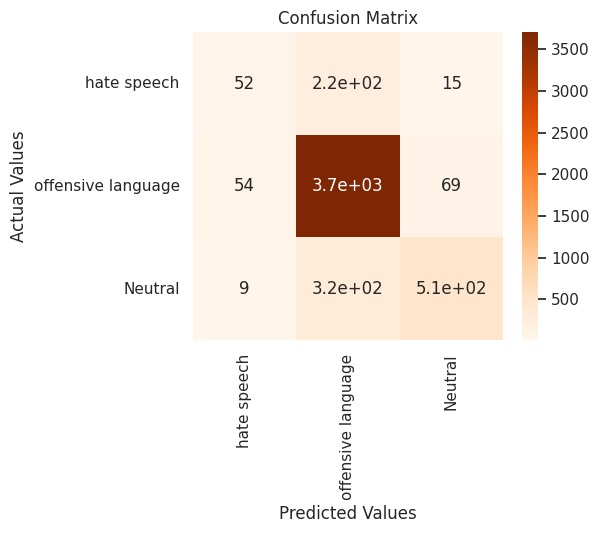

In [63]:
model_evaluate(best_model,X_test)

### Test the model with a hate speech tweet / a offensive speech tweet / Neutral... based on the result that 0 is hate speech, 1 is offensive language and 2 is neutral

In [64]:
test_tweet = ['I hate you']

tweet_tfidf = vectoriser.transform(test_tweet)
lr_model.predict(tweet_tfidf)

array([0])

In [65]:
test_tweet = ['You are so stupid']

tweet_tfidf = vectoriser.transform(test_tweet)
lr_model.predict(tweet_tfidf)

array([1])

In [66]:
test_tweet = ['I am learning data science very well']

tweet_tfidf = vectoriser.transform(test_tweet)
lr_model.predict(tweet_tfidf)

array([1])